 # MOOCCUBEX Data Analysis

## Data loading

The name of the data file used is "user-problem.json". 

|Field    |description                      |   
|:----------|:----------                     |   
|log_id   |ID of the user's question record, combined with a unique key of user_id and problem_id |
|user_id |User ID, starting with U_|
|problem_id	|Problem ID, starting with Pm_|
|is_correct	|Is the question correct|
|attempts	|Number of attempted questions|
|score	|score|
|submit_time	|Question time|

In [1]:
import numpy as np
import pandas as pd
import random 
import re
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import json

As the file size is approximately 21GB,we randomly select records from the file with a probability of 1%.

In [2]:
r_file=open("user-problem.json","r")
length = 0
num = 0
arr,chunks=[],[]
while(True) :
    line = r_file.readline()
    if not line :
        chunks.append(pd.DataFrame(arr))
        arr = []
        break
    if (random.randint(1,100))%100 == 1 :
        text = json.loads(line)
        arr.append(text.values())
        length += 1
        if length == 100000 :
            chunks.append(pd.DataFrame(arr))
            arr = []
            length = 0
df=pd.concat(chunks,ignore_index=True)
chunks.clear()
arr.clear()
# Clear the memory of temporary variable
df.columns=['log_id','problem_id','user_id','is_correct','attempts','score','submit_time']
# Reset the index

## General feature 

In [3]:
df.head()

,log_id,problem_id,user_id,is_correct,attempts,score,submit_time
0,10000444_5567925,Pm_5567925,U_10000444,0,1,-1.0,2020-07-21 00:01:57
1,10000676_3548507,Pm_3548507,U_10000676,1,1,50.0,2020-05-06 16:14:12
2,10000676_4462607,Pm_4462607,U_10000676,1,1,50.0,2020-07-01 16:24:34
3,10000677_4913875,Pm_4913875,U_10000677,0,1,-1.0,2020-07-15 08:53:43
4,10000684_5186646,Pm_5186646,U_10000684,0,1,-1.0,2020-07-20 23:26:24


In [4]:
print("The number of records:")
print(df['log_id'].count())

The number of records:
1334037


In [5]:
print('Part of missing values for every column')
print(df.isnull().sum() / len(df))

Part of missing values for every column
log_id         0.000000
problem_id     0.000000
user_id        0.000000
is_correct     0.000000
attempts       0.000000
score          0.530487
submit_time    0.000000
dtype: float64


In [6]:
print("The number of users")
len(df.user_id.unique())

The number of users


583149

In [7]:
print("The number of  problems")
len(df.problem_id.unique())

The number of  problems


414848

## Sort by user_id

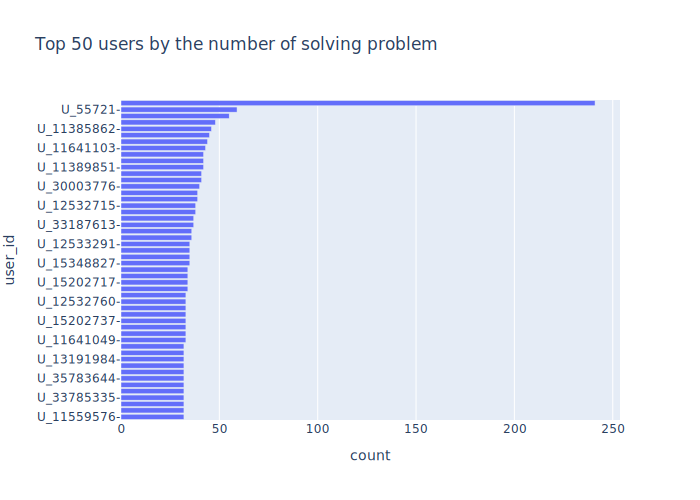

In [8]:
ds = df['user_id'].value_counts().reset_index() 
ds.columns = [
    'user_id',
    'count'
]
ds['user_id'] = ds['user_id'].astype(str) + '-' 
#Transform 'int' type to 'str' type.If not,the program error would be caused by the type of the Y-axis.
ds = ds.sort_values(['count']).tail(50)
fig = px.bar(
    ds,
    x = 'count',
    y = 'user_id',
    orientation='h',
    title='Top 50 users by the number of solving problem'
)
fig.show("svg")

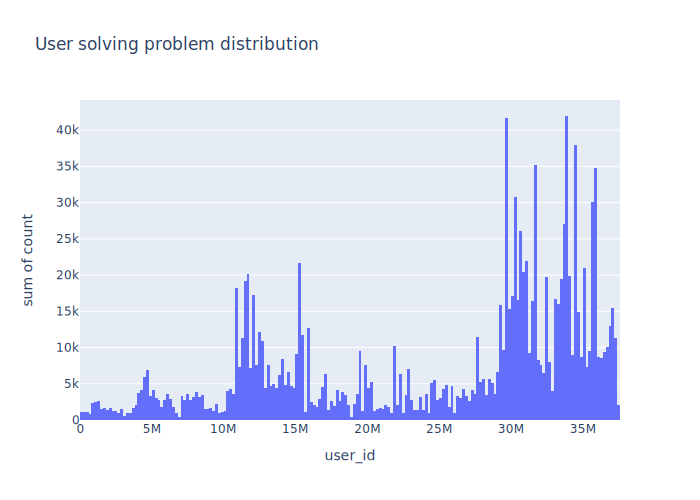

In [9]:
ds = df['user_id'].value_counts().reset_index() 
ds.columns = [
    'user_id',
    'count'
]
ds= ds.astype(str)
ds = ds.applymap(lambda x: re.sub(r'U_','', x))
ds = ds.astype(int)
ds = ds.sort_values('user_id')
fig = px.histogram(
    ds,
    x = 'user_id',
    y = 'count',
    title = 'User solving problem distribution'
)
fig.show("svg")

## Sort by correct answer

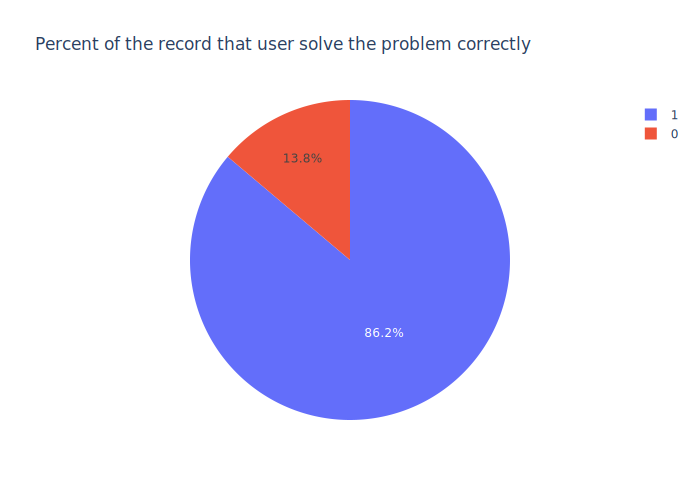

In [10]:
ds = df['is_correct'].value_counts().reset_index()
ds.columns = [
    'is_correct',
    'percent'
]
ds['percent'] /= len(df)
ds = ds.sort_values(['percent'])
fig = px.pie(
    ds,
    names = ['0', '1'],
    values = 'percent',
    title = 'Percent of the record that user solve the problem correctly '    
)
fig.show("svg")

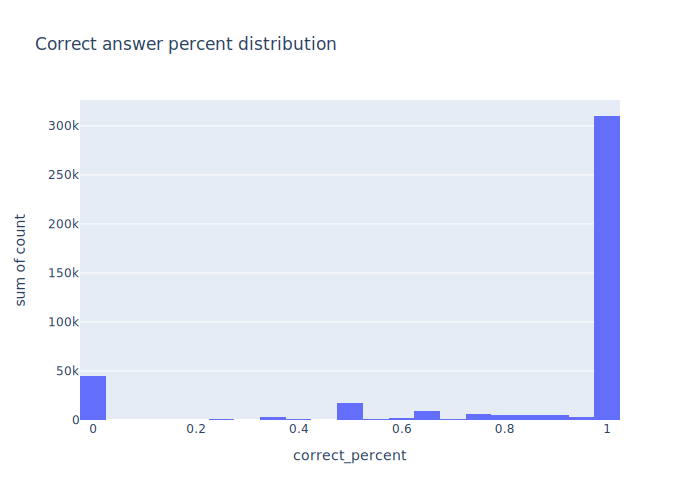

In [11]:
temp =df.groupby('problem_id')['is_correct'].mean() 
temp=temp.reset_index()
temp.columns=['problem_id','correct_percent']
temp=temp['correct_percent'].value_counts().reset_index() 
temp=temp.sort_values(['correct_percent'])
fig = px.histogram(
    temp,
    x = 'correct_percent',
    y = 'count',
    title = 'Correct answer percent distribution'
)
fig.show("svg")

## Sorted by submit_time

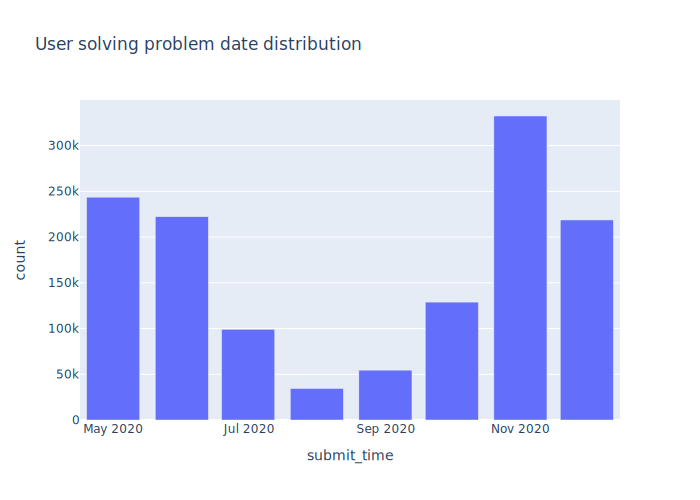

In [12]:
ds=df['submit_time']
ds=pd.DataFrame(ds)
ds = ds.applymap(lambda x: x[0:7])
ds = ds.sort_values(['submit_time'])
ds = ds['submit_time'].value_counts().reset_index()
ds.columns=[
    'submit_time',
    'count'
]
fig = px.bar(
    ds,
    x = 'submit_time',
    y = 'count',
    title = 'User solving problem date distribution'
)
fig.show("svg")

## Sorted by attempts

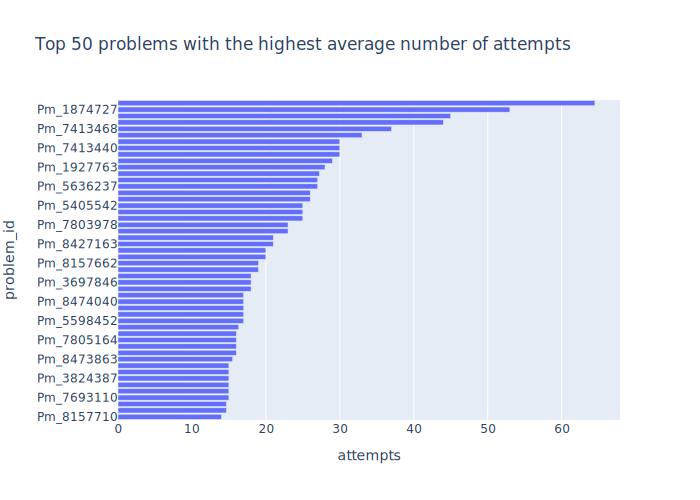

In [13]:
grouped=df.groupby(by=['problem_id'],as_index=False)
series=grouped['attempts'].mean()
series = series.sort_values(['attempts']).tail(50)
fig = px.bar(
    series,
    x = 'attempts',
    y = 'problem_id',
    orientation='h',
    title='Top 50 problems with the highest average number of attempts'
)
fig.show("svg")

## Sorted by problem_id

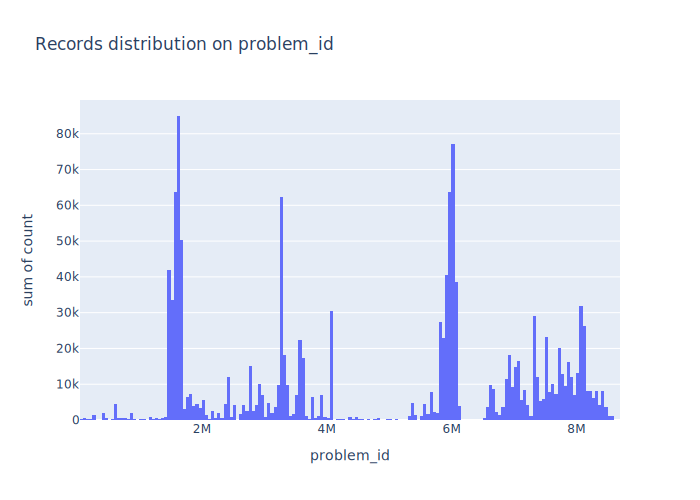

In [14]:
ds = df['problem_id'].value_counts().reset_index()
ds.columns = [
    'problem_id', 
    'count'
]
ds = ds.sort_values('problem_id')
ds= ds.astype(str)
ds = ds.applymap(lambda x: re.sub(r'Pm_','', x))
ds = ds.astype(int)
fig = px.histogram(
    ds, 
    x='problem_id', 
    y='count', 
    title="Records distribution on problem_id"
)
fig.show("svg")

## Sorted by the score of the problems

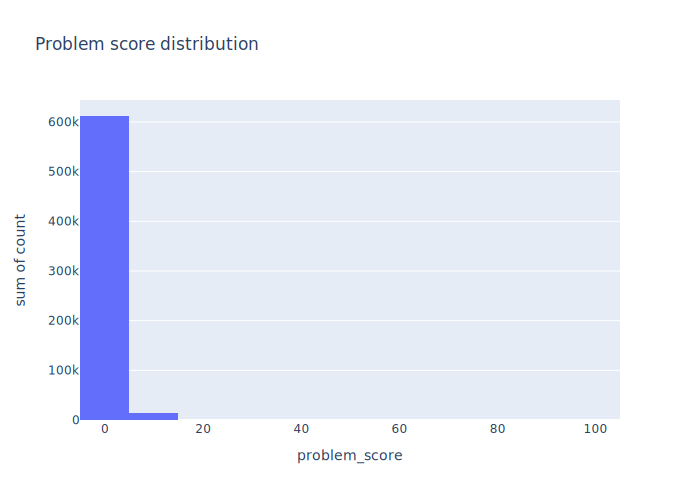

In [15]:
grouped=df.groupby(by=['score'],as_index=False)
ds=grouped['score'].value_counts()
ds.columns=[
    'problem_score',
    'count'
]
ds=ds.sort_values(['problem_score'])
fig = px.histogram(
    ds, 
    x='problem_score', 
    y='count', 
    title='Problem score distribution'
)
fig.show("svg")